In [1]:
# imports
# sqlalchemy imports
from sqlalchemy import create_engine, Column, String, Integer, Numeric, MetaData, Table, type_coerce, ForeignKey, case
from sqlalchemy.orm import create_session 
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.sql import select, and_, or_, not_, func

# other imports
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import pandas as pd

%matplotlib inline

In [2]:
# definitions
dbpath='/ocean/eolson/MEOPAR/obs/WODSelect_46_52_m130_m122_nitrate/WOD2.sqlite'

In [3]:
Base = automap_base()
engine = create_engine('sqlite:///' + dbpath, echo = False)
# reflect the tables in salish.sqlite:
Base.prepare(engine, reflect=True)
# mapped classes have been created

In [4]:
Sta=Base.classes.stationTBL
Prof=Base.classes.profileTBL

In [5]:
session = create_session(bind = engine, autocommit = False, autoflush = True)

In [6]:
qry=session.query(Sta.Year, Sta.Month, Sta.Day, Sta.Latitude, Sta.Longitude, 
                   Prof.Depth, Prof.Temperatur, Prof.Salinity,Prof.Nitrate, Prof.Chlorophyl, 
                   Prof.Phosphate).select_from(Prof).join(Sta,Sta.CastID==Prof.CastID).\
                    filter(and_(
                            Prof.Depth != None,
                            Prof.Chlorophyl != None,
                            Prof.Nitrate != None
                            ))

In [7]:
#for row in data.all():
#    print(row)
qrydf=pd.DataFrame(qry.all())

In [8]:
session.close()
engine.dispose()

In [ ]:
qrydf

In [ ]:
# alternative: load csv

In [ ]:
qrydf=pd.read_csv('/ocean/eolson/MEOPAR/obs/WODSelect_46_52_m130_m122_nitrate/WOD2.csv', index_col=0, parse_dates=True)

In [ ]:
qrydf

In [ ]:
# Using Pandas:

In [ ]:
qrydf.dtypes

In [ ]:
qrydf.head()

In [ ]:
qrydf.tail()

In [ ]:
qrydf.index

In [ ]:
qrydf.columns

In [ ]:
qrydf.values

In [ ]:
qrydf.describe()

In [ ]:
np.nanmean(qrydf['Salinity'])

In [ ]:
qrydf.sort_values(by='Month').head(10)

In [ ]:
# both endpoints are included
qrydf.loc[2:5,['Year','Month']]

In [ ]:
# endpoint not included
qrydf.iloc[2:5,0:2]

In [ ]:
qrydf[qrydf.Day == 1]

In [ ]:
qrydf[qrydf.Chlorophyl > 35.0]

In [ ]:
qrydf[qrydf['Month'].isin([1,4])]

In [ ]:
binD=np.round(qrydf['Depth']/5.0)*5.0
qrydf['binDepth']=binD

In [ ]:
qrydf.loc[10:15,['Depth','binDepth']]

In [ ]:
qrydf[pd.isnull(qrydf['Salinity'])].head()

In [ ]:
qrydf.mean()

In [ ]:
qrydf.apply(lambda x: x.mean())

In [ ]:
qrydf.apply(lambda x: x.max() - x.min())

In [ ]:
# merge:
mondf = pd.DataFrame({'Month': [1,2,3,4,5,6,7,8,9,10,11,12], 
                      'strMon': ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']})

In [ ]:
qrydf2=pd.merge(qrydf, mondf, on='Month')
qrydf2.head(30)

In [ ]:
# grouping
qrydf.groupby(['Year','Month','binDepth']).mean()

In [ ]:
# grouping
qrydf.groupby(['Year','Month']).count()

In [ ]:
# plots

In [ ]:
qrydf.hist(figsize=(10,10))

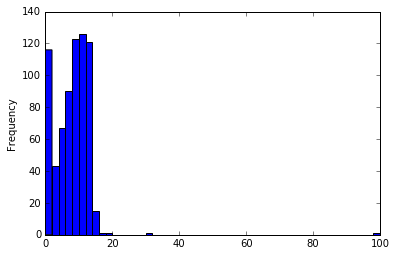

In [9]:
NtoP=qrydf['Nitrate'][qrydf['Phosphate']>0]/qrydf['Phosphate'][qrydf['Phosphate']>0]
NtoP.plot(kind='hist',bins=50)

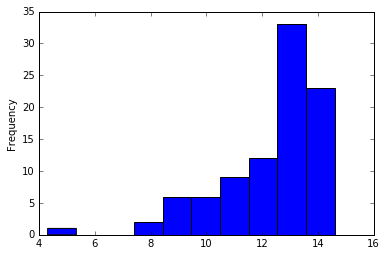

In [10]:
NtoP[(qrydf['Phosphate']>0) & (qrydf['Depth']>80)].plot(kind='hist', bins=10)

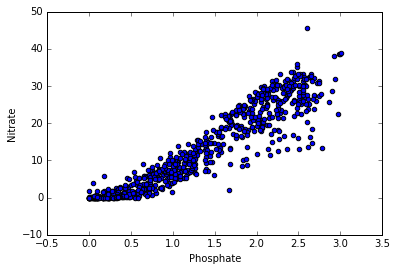

In [11]:
qrydf.plot(kind='scatter',x='Phosphate',y='Nitrate')